In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

In [26]:
picks = pd.read_csv('1_Pre-processed data.csv')
beds = picks[(picks['type'] == 'Bed boundary')].copy()
fractures = picks[(picks['type'] == 'Conductive, HC') | (picks['type'] == 'Conductive, LC')].copy()
mudlog = pd.read_csv('1_pre-processed mudlog.csv')

# these imports and boolean statements are from the second notebook, 
# so we have not included the usual checks

In [36]:


def tail_endpoint(depths, dipazs, dips, tail_length, fig_x_width, fig_y_width, ylim_max, xlim_max):
    """
    Calculate and return the x and y coordinates for the tadpole tail endpoints.

    Parameters:
    - depths (list or array): List of depths for each data point.
    - dipazs (list or array): List of dip azimuths for each data point.
    - dips (list or array): List of dip angles for each data point.
    - tail_length (float): The length of the tail as a decimal percentage of the axis scale.
    - fig_x_width (float): Width of the figure in inches.
    - fig_y_width (float): Height of the figure in inches.
    - ylim_max (float): Maximum depth of the plot.
    - xlim_max (float): Maximum dip of the plot.

    Returns:
    - tuple: A tuple containing two lists, the first with x coordinates of tail endpoints
             and the second with y coordinates of tail endpoints.
    
    Notes:
    - fig_x_width and fig_y_width are the values passed in when making the figure (fig_size=(x,y))
      and these widths determine the aspect ratio of the plot (n pixels in each direction).
    - fig_ratio is a multiplier on y or x axis tail length depending on which plot axis has more pixels
    """
    tail_endpoints_y = []
    tail_endpoints_x = []

    for depth, dipaz, dip in zip(depths, dipazs, dips):

        if fig_x_width < fig_y_width:
            fig_ratio = fig_y_width / fig_x_width # this is the ratio of y to x inches (pixels)
            tail_endpoints_y.append(depth - (ylim_max * tail_length) * math.cos(math.radians(dipaz)))
            tail_endpoints_x.append(dip + (xlim_max * tail_length * fig_ratio) * math.sin(math.radians(dipaz)))

        else:
            fig_ratio = fig_x_width / fig_y_width
            tail_endpoints_y.append(depth - (ylim_max * tail_length * fig_ratio) * math.cos(math.radians(dipaz)))
            tail_endpoints_x.append(dip + (xlim_max * tail_length) * math.sin(math.radians(dipaz)))
    
    return tail_endpoints_x, tail_endpoints_y



(4000.0, 0.0)

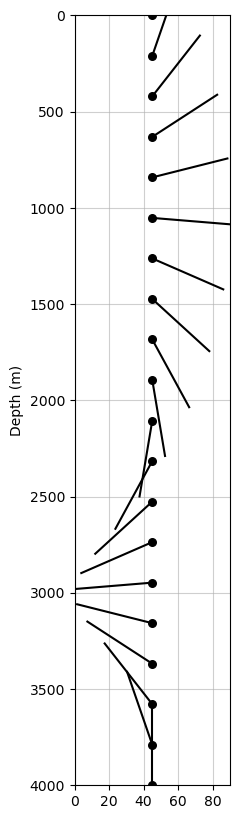

In [37]:

# make a test dataset using np.linspace
dips = np.linspace(45, 45, 20)
dipazs = np.linspace(0, 360, 20)
depths = np.linspace(0, 4000, 20)

# Log length
log_top = min(depths)
log_bot = max(depths)

# Fix the aspect ratio of the plot
fig_x_width = 2 
fig_y_width = 10

# make the figure
fig, ax = plt.subplots(1,1,figsize=(fig_x_width,fig_y_width))

# fix the axis scales
xlim_max = 90
ylim_max = log_bot

# Calculate tail endpoints
tail_endpoints_y = []
tail_endpoints_x = []

tail_length = 0.1 # as a % of the axis scale

tail_endpoints_x_test, tail_endpoints_y_test = tail_endpoint(
    depths, dipazs, dips, tail_length, fig_x_width, fig_y_width, ylim_max, xlim_max
    )

# Plot the tadpoles

for depth, dip, tail_endpoint_x, tail_endpoint_y in zip(depths, dips, tail_endpoints_x_test, tail_endpoints_y_test):
    
        # plot the head
    
        ax.scatter(
            dip,
            depth,
            s = 30,
            color = 'k',
        )
    
        # plot the tail
    
        ax.plot(
            [dip, tail_endpoint_x],
            [depth, tail_endpoint_y],
            color = 'k'
        )

# Format plot

ax.xaxis.set_ticks([0,20,40,60,80,])
ax.set_xlim(0,90)
ax.set_ylabel('Depth (m)')
ax.grid(alpha=0.6)
ax.set_ylim(log_bot, log_top)


(995.4908070349536, 506.6371652931456)

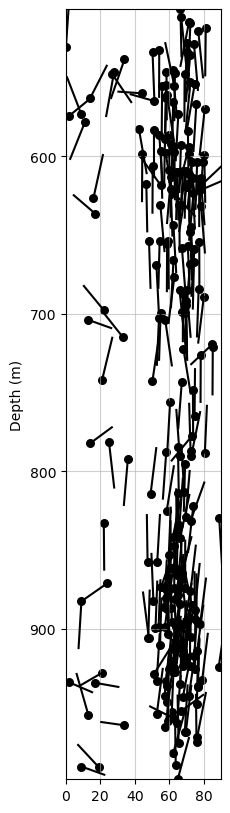

In [39]:
# The tadpole tails are different lengths when I use the "real" data
# I can't see why this would be the case - the function is the same and the variables passed in are also the same

dips = fractures['dip'].values
dipazs = fractures['dip_az'].values
depths = fractures['depth_m'].values

# Log length
log_top = min(depths)
log_bot = max(depths)

# Fix the aspect ratio of the plot
fig_x_width = 2 
fig_y_width = 10

# make the figure
fig, ax = plt.subplots(1,1,figsize=(fig_x_width,fig_y_width))

# fix the axis scales
xlim_max = 90
ylim_max = log_bot

# Calculate tail endpoints
tail_endpoints_y = []
tail_endpoints_x = []

tail_length = 0.03 # as a % of the axis scale

tail_endpoints_x_test, tail_endpoints_y_test = tail_endpoint(
    depths, dipazs, dips, tail_length, fig_x_width, fig_y_width, ylim_max, xlim_max
    )

# Plot the tadpoles

for depth, dip, tail_endpoint_x, tail_endpoint_y in zip(depths, dips, tail_endpoints_x_test, tail_endpoints_y_test):
    
        # plot the head
    
        ax.scatter(
            dip,
            depth,
            s = 30,
            color = 'k',
        )
    
        # plot the tail
    
        ax.plot(
            [dip, tail_endpoint_x],
            [depth, tail_endpoint_y],
            color = 'k'
        )

# Format plot

ax.xaxis.set_ticks([0,20,40,60,80,])
ax.set_xlim(0,90)
ax.set_ylabel('Depth (m)')
ax.grid(alpha=0.6)
ax.set_ylim(log_bot, log_top)
